## Facial recognition and detection by label keyword 

In this project an image search application is created to detect and extract facial images from newspaper, magazines, and online webpage screenshots. The application will search for facial images with the occurrences of keywords, it will use the OpenCV library function to detect faces, Pyesseract to do optical character recognition, PIL to composite images together into contact sheets, and the zipfile library to read and retreave data source images stored as png files. The application uses a trained classifiers model for detecting objects of a particular type. https://github.com/opencv/opencv/tree/master/data/haarcascades 



#### import libraries

In [1]:
import zipfile
from PIL import Image
import pytesseract
import cv2
import numpy as np

#### OpenCV classifier 

In [2]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 

#### file directory paths

#### define search image function 

In [3]:
def rostro_search(zip_file, string):

    path = zip_file
    folder = zipfile.ZipFile(path, 'r')
    name_list = folder.namelist()

    image_dict = {}
    
    for item_name in name_list:

        img_file = folder.open(item_name)    
        cv2_img = cv2.imdecode(np.frombuffer(img_file.read(), np.uint8), 1)  
        gray = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)    
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        img = Image.open(img_file)
        text = pytesseract.image_to_string(img)
        image_dict[item_name] = (img, text, faces)      

    for key in image_dict:
    
        if string in image_dict[key][1]:
            print('Results found in file', key)
        
            faces = image_dict[key][2]
            if len(faces) < 1:
                print('But there were no faces in that file!')
                continue
                
            contact_img_height = 100
            contact_img_width = 100
            num_rows = int(np.ceil(len(faces) / 5))
            contact_sheet = Image.new('RGB', (5 * contact_img_width, num_rows * contact_img_height))
        
            img = image_dict[key][0]
            face_imgs = []
            for face in faces:
                cropped_img = img.crop((face[0], face[1], face[0] + face[2], face[1] + face[3]))
                face_imgs.append(cropped_img)
            
            x = 0
            y = 0

            for face_img in face_imgs:            
                face_img_width = face_img.width
                face_img_height = face_img.height
                
                if (face_img_width > contact_img_width) or (face_img_height > contact_img_height):
                    contact_sheet.paste(face_img.resize((contact_img_width, contact_img_height)), (x, y))
                else:
                    contact_sheet.paste(face_img, (x, y))
                
                if x + contact_img_width == contact_sheet.width:
                    x = 0
                    y = y + contact_img_height
                else:
                    x = x + contact_img_width

            display(contact_sheet)        

#### search keyword: alien

Results found in file a-14.png


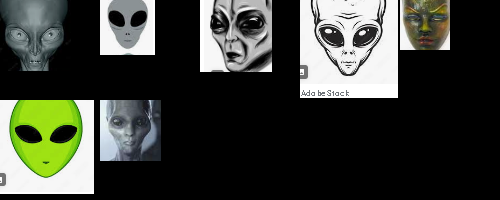

Results found in file a-15.png


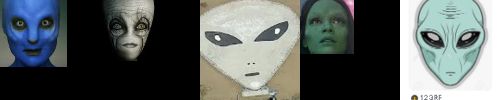

Results found in file a-16.png


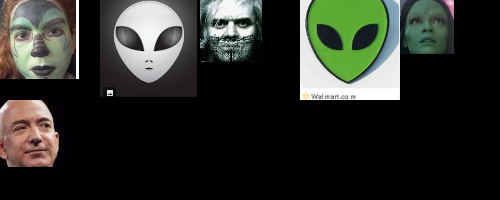

Results found in file a-38.png


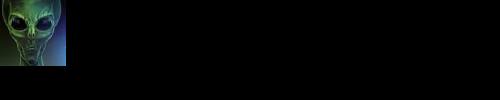

Results found in file a-42.png


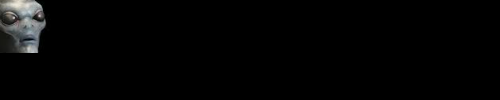

Results found in file a-46.png


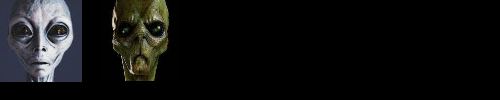

Results found in file a-47.png


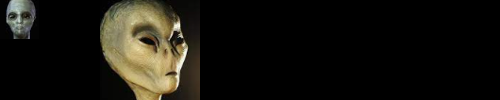

Results found in file a-48.png


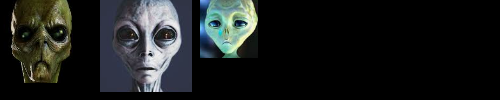

In [4]:
zip_file = 'faces5.zip' # files in zip floder - there should be no folder, only images
string = "alien"

rostro_search(zip_file, string)

#### search keyword: ugly

Results found in file a-13.png


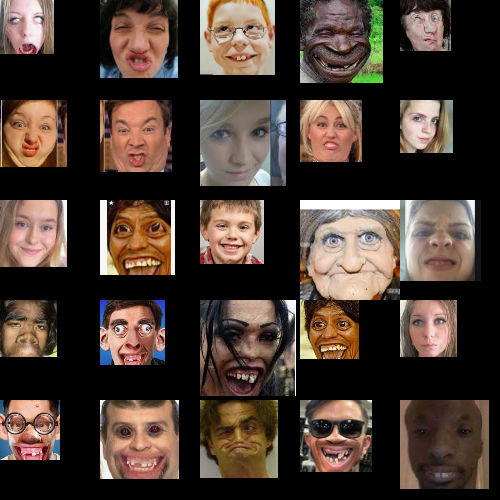

Results found in file a-37.png


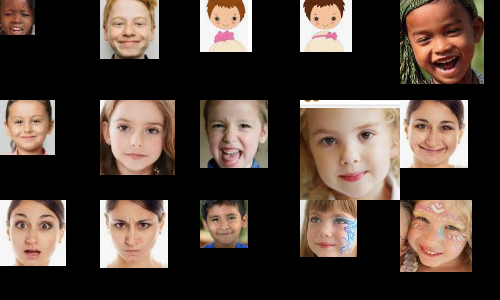

In [5]:
zip_file = 'faces5.zip'  # files in zip floder - there should be no folder, only images
string = "ugly"

rostro_search(zip_file, string)

#### search keyword: chimp

Results found in file a-0.png


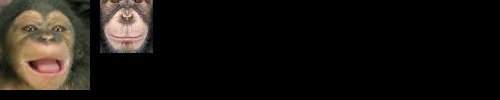

Results found in file a-18.png


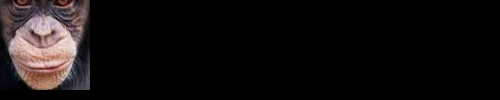

Results found in file a-19.png
But there were no faces in that file!
Results found in file a-20.png
But there were no faces in that file!
Results found in file a-21.png
But there were no faces in that file!
Results found in file a-22.png


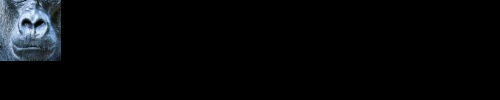

Results found in file a-43.png


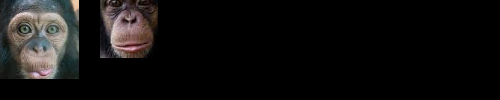

Results found in file a-44.png


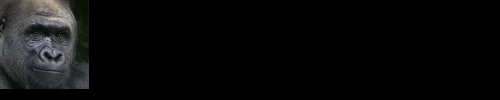

Results found in file a-78.png
But there were no faces in that file!
Results found in file a-79.png


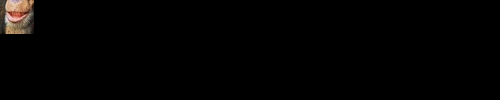

Results found in file a-82.png


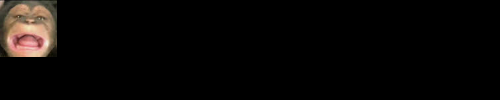

Results found in file a-87.png


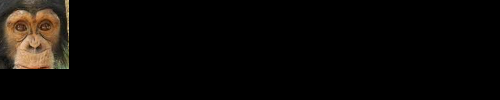

Results found in file a-88.png
But there were no faces in that file!


In [6]:
zip_file = 'faces5.zip'  # files in zip floder - there should be no folder, only images
string = "chimp"

rostro_search(zip_file, string)

#### search keyword: evil

Results found in file a-11.png


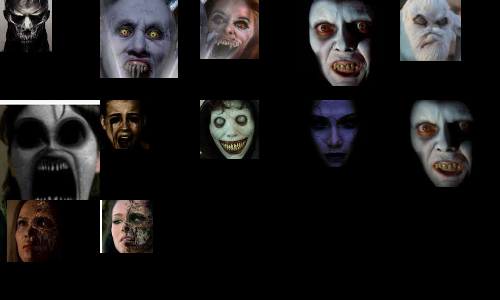

In [7]:
zip_file = 'faces5.zip'  # files in zip floder - there should be no folder, only images
string = "evil"

rostro_search(zip_file, string)

#### search keyword: roman

Results found in file a-77.png


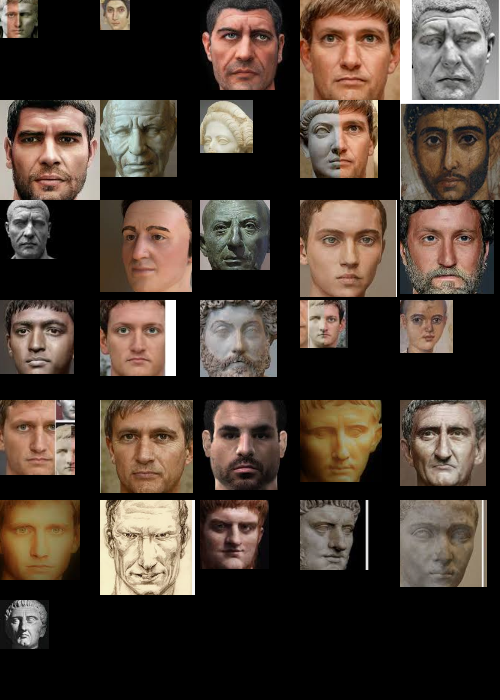

In [8]:
zip_file = 'faces5.zip'  # files in zip floder - there should be no folder, only images
string = "roman"

rostro_search(zip_file, string)

In [ ]:
zip_file = 'faces5.zip' # files in zip floder - there should be no folder, only images
string = "happy"

rostro_search(zip_file, string)

--------------------------

#### End

==========================================================================================================================

**Author:** Jose H Chiriboga ~ Copyright © Jose H Chiriboga, 2021. This notebook and its source code are released under the terms of the MIT License.